In [32]:
#%matplotlib inline

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [34]:
def myfunc(dataframe, filename):
    cat_values = dataframe.categorical.unique()
    no_of_categories = len(cat_values)
    no_of_rows = 1 + no_of_categories + 1
    
    fig, axes = plt.subplots(nrows = no_of_rows, ncols = 3, figsize = (30, 100))
    
    ax1 = fig.add_subplot(no_of_rows, 3, 1)
    dataframe.boxplot(column="quant1")
    ax1.set_xlabel('quant1')
    ax1.set_title("Boxplot of quant1 overall")
    #plt.show()

    ax2 = fig.add_subplot(no_of_rows, 3, 2)
    dataframe.boxplot(column="quant2")
    ax2.set_xlabel('quant2')
    ax2.set_title("Boxplot of quant2 overall")
    #plt.show()

    ax3 = fig.add_subplot(no_of_rows, 3, 3)
    dataframe.boxplot(column="quant3")
    ax3.set_xlabel('quant3')
    ax3.set_title("Boxplot of quant3 overall")
    #plt.show()
    
    i = 4
    
    for val in cat_values:
        
        catdata = dataframe.loc[dataframe['categorical'] == val]
        ax = fig.add_subplot(no_of_rows, 3, i)
        catdata.boxplot(column = "quant1")
        ax.set_xlabel("quant1")
        ax.set_title("Boxplot of quant1 for category " + val)
        #plt.show()
        
        i = i + 1
        ax = fig.add_subplot(no_of_rows, 3, i)
        catdata.boxplot(column = "quant2")
        ax.set_xlabel("quant2")
        ax.set_title("Boxplot of quant2 for category " + val)
        #plt.show()
        
        i = i + 1
        ax = fig.add_subplot(no_of_rows, 3, i)
        catdata.boxplot(column = "quant3")
        ax.set_xlabel("quant3")
        ax.set_title("Boxplot of quant3 for category " + val)
        #plt.show()
        
        i = i + 1
        
    lon_arr=[]  
    lat_arr=[]  
    for x in dataframe["longitude"][1:1000]: lon_arr.append(x)  
    for x in dataframe["latitude"][1:1000]: lat_arr.append(x)

    ax = fig.add_subplot(no_of_rows, 3, i)
    map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,lat_0=0, lon_0=-130)
    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color = 'gray')
    map.drawmapboundary()

    x,y = map(lon_arr, lat_arr)

    map.plot(x, y, 'r.', markersize=6, ax=ax)
    
    plt.savefig(filename, dpi=100)
    plt.show()

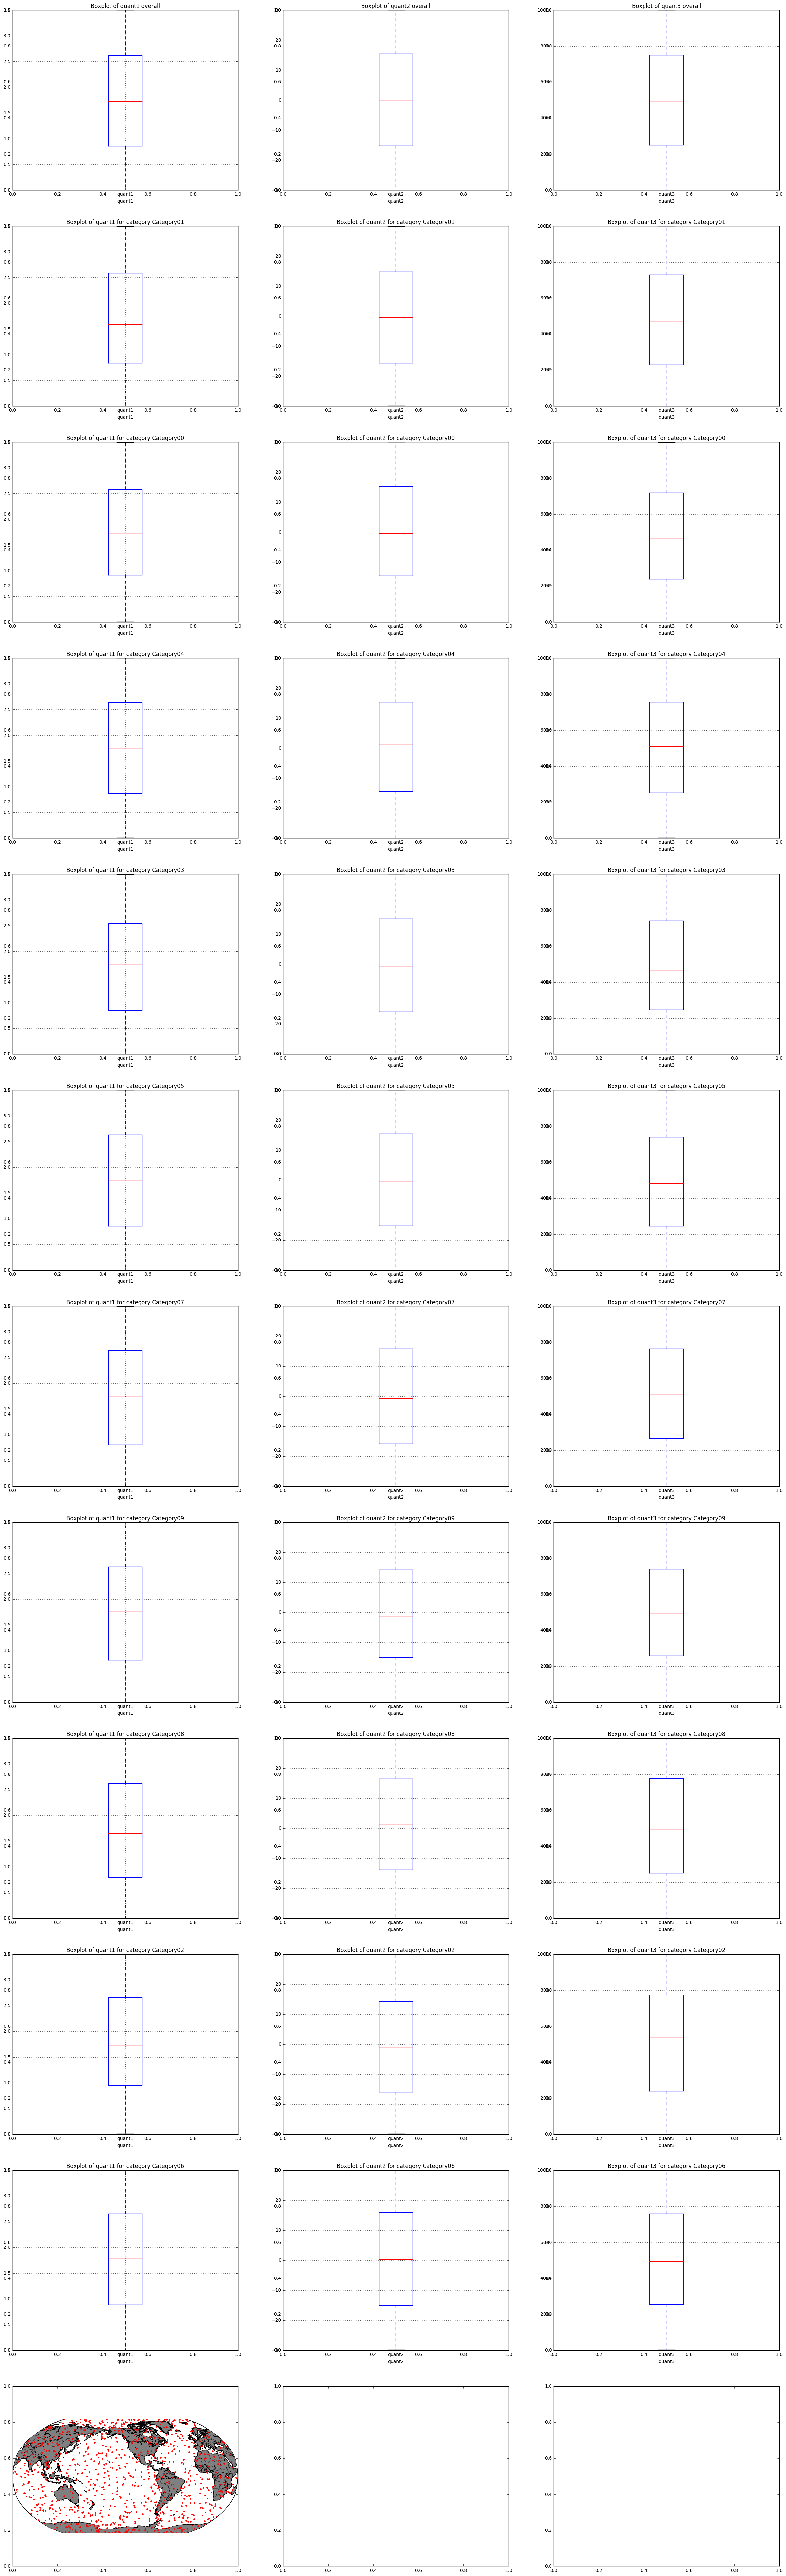

In [35]:
df = pd.read_csv("sample_flat.csv")
myfunc(df, "out.png")